In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib

In [21]:
data = pd.read_csv('winequality-red.csv')

In [22]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [23]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [24]:
data.shape

(1599, 12)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [26]:
# Check null values
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [27]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Bivariate analysis

#### Quality vs Fixed Acidity

In [28]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

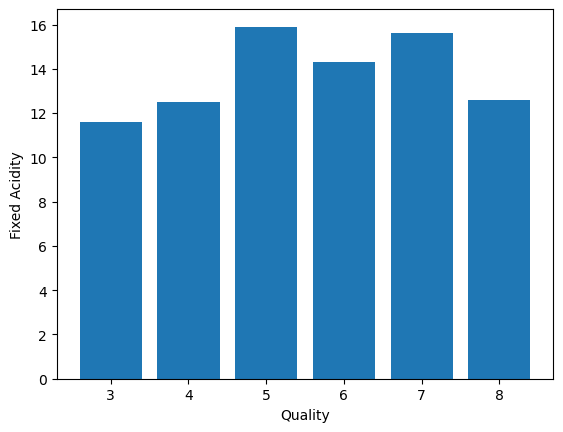

In [29]:
plt.bar(data['quality'], data['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('Fixed Acidity')
plt.show()

#### Quality vs Volatile Acidity

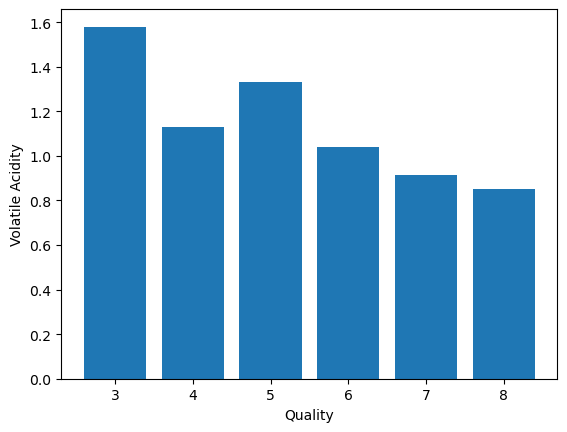

In [30]:
plt.bar(data['quality'], data['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('Volatile Acidity')
plt.show()

#### Quality vs Residual Sugar

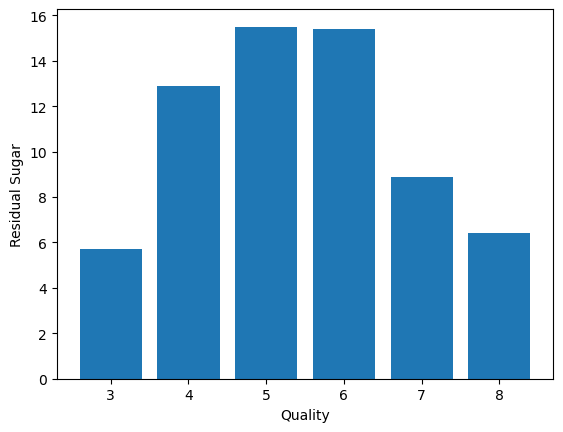

In [31]:
plt.bar(data['quality'], data['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('Residual Sugar')
plt.show()

#### Quality vs Chlorides

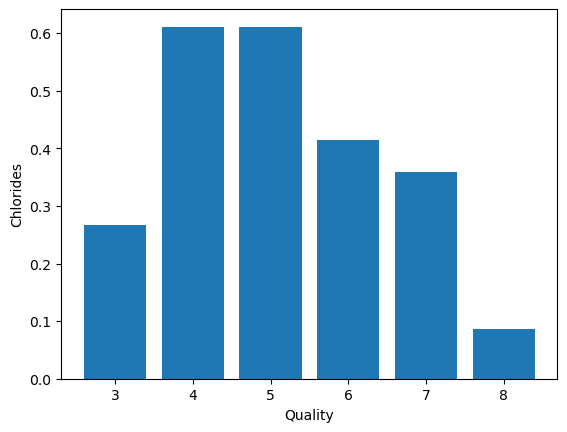

In [32]:
plt.bar(data['quality'], data['chlorides'])
plt.xlabel('Quality')
plt.ylabel('Chlorides')
plt.show()

#### Quality vs Total Sulfur Dioxide

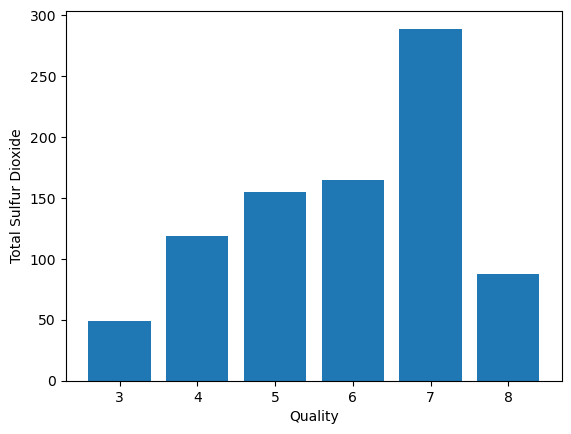

In [33]:
plt.bar(data['quality'], data['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('Total Sulfur Dioxide')
plt.show()

#### Quality vs Alcohol

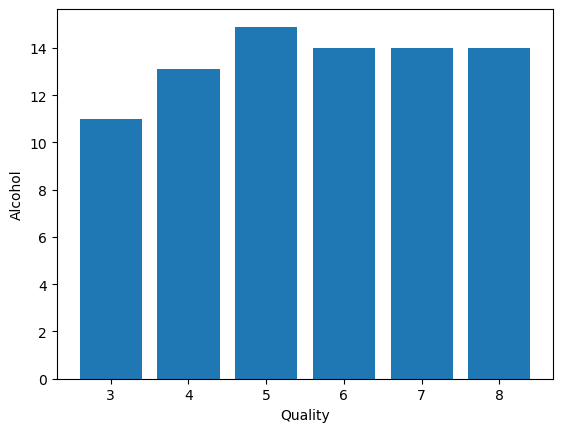

In [34]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

### Correlation Matrix

<Axes: >

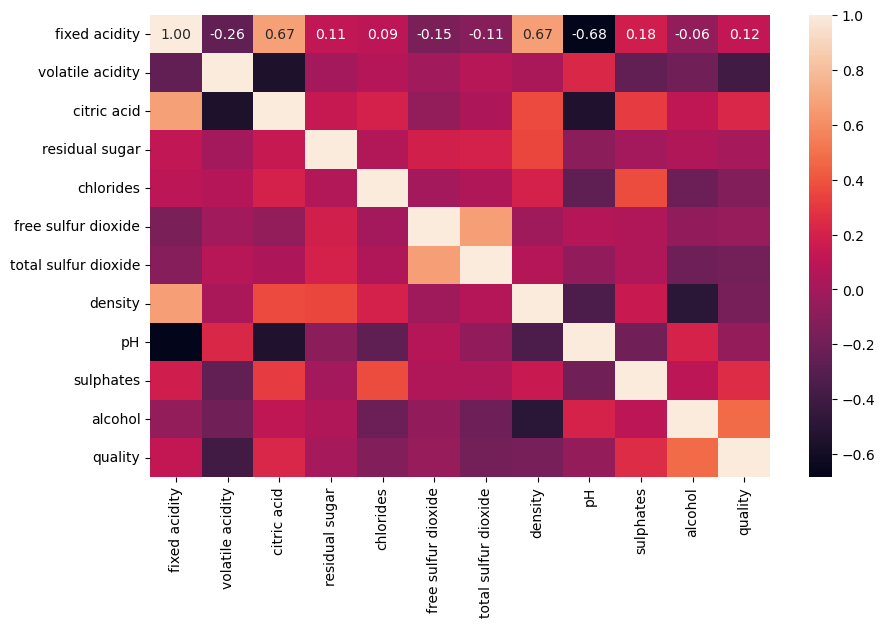

In [35]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot = True, fmt = '0.2f')

### Binarization of target variable

In [36]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3])

Put 1 if the value is greater than or equal to 7, else 0.

In [37]:
data['quality'] = [1 if x >= 7 else 0 for x in data['quality']]

### Not handling imbalanced dataset

In [38]:
data['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

<Axes: xlabel='quality'>

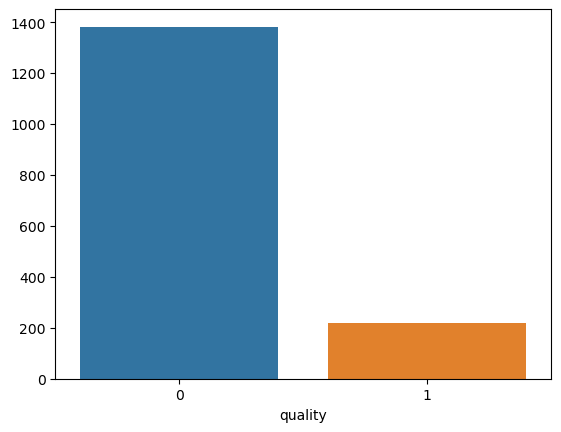

In [39]:
sns.barplot(x=data['quality'].value_counts().index, y = data['quality'].value_counts().values)

Dataset is imbalanced.
Imbalanced refers to the datasets where the target class has an uneven distribution of observations.

### Store Feature Matrix In X And Response (Target) In Vector y

In [40]:
X = data.drop('quality', axis = 1)
y = data['quality']

### Splitting The Dataset Into The Training Set And Test Set

To evaluate the performance of the models

In [41]:
# Divide the data set into two sets: training and testing
# Train the model on X_train and y_train
# Perform prediction using X_test an compare the predictor result with y_test
# test_size = 0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

Feature scaling allows to put features into the same scale

Feature scaling is essential for mchine learning algorithms that calculate distances between data. If not, features with higher value range starts dominating when calculating distances.

In [42]:
# Put the features into the same scale
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

### Applying PCA

Principal component analysis is a dimensionality reduction method often used to reduce the dimensionality of large data sets by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Giving a PCA model a sample with input features, the output is a complete new set of features.

With PCA we can capture whatever information represented by the 11 columns in the data set and represent the same information with two column data set. Model training is very computationally intensive process and few features typically need less resources for training. Reduce the number of variables of a data set while prereserving as much information as possible.

In [43]:
# Specify the number of components
# Let PCA figure it out. Tell PCA how much information it needs to retain as percentage.
# 0.90 means 90% of the information will be retained from the data set
pca = PCA(n_components = 0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [44]:
pca.explained_variance_ratio_

array([0.2801769 , 0.17563995, 0.13957636, 0.11081822, 0.09021248,
       0.05908698, 0.05266627])

In [45]:
sum(pca.explained_variance_ratio_)

0.9081771725272516

The target variable is having categorical values 0 for bad quality wine and 1 for good quality wine. This is a classification problem. We are going to us different classification models.

### Logistic Regression

In [46]:
# Create an instance of Logistic Regression
lr = LogisticRegression()

# Perform training. Independent variables are X_train and dependent variable is y_train.
lr.fit(X_train, y_train)

LogisticRegression()

In [47]:
# Perform prediction on unseen samples
# Assign the prediction result to y_predict1
y_predict1 = lr.predict(X_test)

In [48]:
# Check the accuracy of the model
# Pass actual values and predicted values
accuracy_score(y_test, y_predict1)

0.853125

Logictic regression is about 85 percent accurate on this data set.

Check precision score, recall score and f1 score

In [49]:
# Precision score 
precision_score(y_test, y_predict1)

0.5

In [50]:
# Recall score
recall_score(y_test, y_predict1)

0.2765957446808511

In [51]:
# F1 score
f1_score(y_test, y_predict1)

0.3561643835616438

Compared to accuracy, precision score, recall score and f1 score are very low due to the imbalanced data set. That's why we have to imbalance the data set.

### Handling imbalanced dataset

We can use two techniques. Oversampling and undersampling. We can over sample the minority class using replacement (oversampling). We can randomly delete rows from the majority class to match this with the minority class (undersampling). The disadvantage of undersampling is that we lose a lot of valuable data.  

Oversampling with Synthetic Minority Oversampling Technique. It is one of the most commonly used oversampling methods. It aims to balance class distribution by randomly increasing minority class examples by replacing them. Synthesizes new minority instances between minority instances. Generates virtual training records by linear interpolation for the minority class. The advantage is that you are not generating duplicates but rather creating synthetic data points that are slightly different from the original data points. 

In [52]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [53]:
y_res.value_counts()

quality
0    1382
1    1382
Name: count, dtype: int64

### Splitting The Dataset Into The Training Set And Test Set

To evaluate the performance of the models

In [54]:
# Divide the data set into two sets: training and testing
# Train the model on X_train and y_train
# Perform prediction using X_test an compare the predictor result with y_test
# test_size = 0.2 means 20% of the data will be used for testing
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

### Feature Scaling

In [55]:
# Put the features into the same scale
st = StandardScaler()
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

#### Applying PCA

In [56]:
# Specify the number of components
# Let PCA figure it out. Tell PCA how much information it needs to retain as percentage.
# 0.90 means 90% of the information will be retained from the data set
pca = PCA(n_components = 0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [57]:
pca.explained_variance_ratio_

array([0.29060088, 0.18650415, 0.14345662, 0.10700321, 0.08365999,
       0.06127379, 0.04598891])

In [58]:
pca.explained_variance_ratio_

array([0.29060088, 0.18650415, 0.14345662, 0.10700321, 0.08365999,
       0.06127379, 0.04598891])

#### Logistic Regression

In [59]:
# Create an instance of Logistic Regression
lr = LogisticRegression()

# Perform training. Independent variables are X_train and dependent variable is y_train.
lr.fit(X_train, y_train)

LogisticRegression()

In [60]:
# Perform prediction on unseen samples
# Assign the prediction result to y_predict1
y_predict1 = lr.predict(X_test)

In [62]:
# Check the accuracy of the model
# Pass actual values and predicted values
accuracy_score(y_test, y_predict1)

0.8047016274864376

In [63]:
# Precision score 
precision_score(y_test, y_predict1)

0.7711267605633803

In [64]:
# Recall score
recall_score(y_test, y_predict1)

0.8358778625954199

In [65]:
# F1 score
f1_score(y_test, y_predict1)

0.8021978021978022

#### Support Vector Classifier - SVC

In [67]:
svm = svm.SVC()

In [68]:
svm.fit(X_train, y_train)

SVC()

In [69]:
y_predict2 = svm.predict(X_test)

In [70]:
accuracy_score(y_test, y_predict2)

0.8734177215189873

In [71]:
precision_score(y_test, y_predict2)

0.8287671232876712

In [73]:
recall_score(y_test, y_predict2)

0.9236641221374046

In [72]:
f1_score(y_test, y_predict2)

0.8736462093862816

#### K Nearest Neighbours Classifier

In [75]:
knn = KNeighborsClassifier()

In [76]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [77]:
y_predict3 = knn.predict(X_test)

In [78]:
accuracy_score(y_test, y_predict3)

0.8770343580470162

In [79]:
precision_score(y_test, y_predict3)

0.8069620253164557

In [80]:
recall_score(y_test, y_predict3)

0.9732824427480916

In [81]:
f1_score(y_test, y_predict3)

0.8823529411764706

#### Decision Tree Classifier

In [83]:
dt = DecisionTreeClassifier()

In [84]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [86]:
y_predict4 = dt_predict = dt.predict(X_test)

In [87]:
accuracy_score(y_test, y_predict4)

0.8607594936708861

In [88]:
recall_score(y_test, y_predict4)

0.8778625954198473

In [89]:
f1_score(y_test, y_predict4)

0.8566108007448789

#### Random Forest Classifier

In [91]:
rf = RandomForestClassifier()

In [92]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_predict5 = rf.predict(X_test)

In [94]:
accuracy_score(y_test, y_predict5)

0.9059674502712477

In [95]:
recall_score(y_test, y_predict5)

0.9427480916030534

In [96]:
f1_score(y_test, y_predict5)

0.9047619047619048

#### Gradient Booster Classifier

In [98]:
gbc = GradientBoostingClassifier()

In [99]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [100]:
y_predict6 = gbc.predict(X_test)

In [101]:
accuracy_score(y_test, y_predict6)

0.8770343580470162

In [102]:
precision_score(y_test, y_predict6)

0.8464285714285714

In [103]:
recall_score(y_test, y_predict6)

0.9045801526717557

In [104]:
f1_score(y_test, y_predict6)

0.8745387453874539

In [111]:
final_data = pd.DataFrame({'Model': ['Logistic Regression', 'SVM', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
               "Accuracy" : [accuracy_score(y_test, y_predict1)*100, 
                             accuracy_score(y_test, y_predict2)*100, 
                             accuracy_score(y_test, y_predict3)*100, 
                             accuracy_score(y_test, y_predict4)*100, 
                             accuracy_score(y_test, y_predict5)*100, 
                             accuracy_score(y_test, y_predict6)*100],
               "Precision" : [precision_score(y_test, y_predict1)*100, 
                              precision_score(y_test, y_predict2)*100, 
                              precision_score(y_test, y_predict3)*100, 
                              precision_score(y_test, y_predict4)*100, 
                              precision_score(y_test, y_predict5)*100, 
                              precision_score(y_test, y_predict6)*100],
               "Recall" : [recall_score(y_test, y_predict1)*100,
                           recall_score(y_test, y_predict2)*100,
                           recall_score(y_test, y_predict3)*100,
                           recall_score(y_test, y_predict4)*100,
                           recall_score(y_test, y_predict5)*100,
                           recall_score(y_test, y_predict6)*100],
               "F1 Score" : [f1_score(y_test, y_predict1)*100, 
                            f1_score(y_test, y_predict2)*100, 
                            f1_score(y_test, y_predict3)*100, 
                            f1_score(y_test, y_predict4)*100, 
                            f1_score(y_test, y_predict5)*100, 
                            f1_score(y_test, y_predict6)*100]})

In [112]:
final_data

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,80.470163,77.112676,83.587786,80.219780
1,SVM,87.341772,82.876712,92.366412,87.364621
2,KNN,87.703436,80.696203,97.328244,88.235294
3,Decision Tree,86.075949,83.636364,87.786260,85.661080
4,Random Forest,90.596745,86.971831,94.274809,90.476190
5,Gradient Boosting,87.703436,84.642857,90.458015,87.453875


<Axes: xlabel='Model', ylabel='Accuracy'>

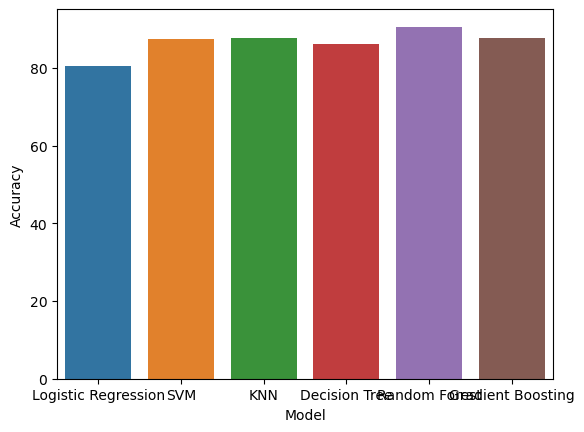

In [113]:
sns.barplot(x = final_data['Model'], y = final_data['Accuracy'])

#### Save the model

In [114]:
X = data.drop('quality', axis = 1)
y = data['quality']

After binarization, the data set became imbalanced. That's why we use SMOTE.

In [115]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [116]:
st = StandardScaler()
X = st.fit_transform(X_res)

In [117]:
# Dimensionality reduction
X = pca.fit_transform(X)

In [118]:
rf = RandomForestClassifier()
rf.fit(X, y_res)

RandomForestClassifier()

In [120]:
# Save the model
joblib.dump(rf, "wine_quality_prediction")

['wine_quality_prediction']

In [121]:
# Load the model
model = joblib.load("wine_quality_prediction")

#### Prediction on New Data

In [125]:
new_data = pd.DataFrame({'fixed acidity':7.3,
'volatile acidity':0.65,
'citric acid' :0.00,
'residual sugar':1.2,
'chlorides' :0.065,
'free sulfur dioxide':15.0,
'total sulfur dioxide' :21.0,
'density' :0.9946,
'pH': 3.39,
'sulphates' :0.47,
'alcohol' :10.0,}, index=[0])

In [126]:
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0


In [127]:
# Feature scaling
test = pca.transform(st.transform(new_data))

In [128]:
predict = model.predict(test)

In [129]:
predict

array([1])

In [130]:
if predict == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Good Quality Wine
